In [14]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

In [ ]:
df1 = pd.read_excel('AfghanistanPlayersOverview.xlsx')
df2 = pd.read_excel('AustralianPlayersOverview.xlsx')
df3 = pd.read_excel('BangladeshPlayersOverview.xlsx')
df4 = pd.read_excel('EnglandPlayersOverview.xlsx')
df5 = pd.read_excel('IndiaPlayersOverview.xlsx')
df6 = pd.read_excel('IrelandPlayersOverview.xlsx')
df7 = pd.read_excel('NewZealandPlayersOverview.xlsx')
df8 = pd.read_excel('PakistanPlayersOverview.xlsx')
df9 = pd.read_excel('SouthAfricaPlayersOverview.xlsx')
df10 = pd.read_excel('SriLankaPlayersOverview.xlsx')
df11 = pd.read_excel('WestIndiesPlayersOverview.xlsx')
df12 = pd.read_excel('ZimbabwePlayersOverview.xlsx')

In [16]:
df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12], axis=0, ignore_index=True)

In [17]:
df.sample(5)

,PlayerName,PersonDetail,Links,Stats,TopStats
235,Damien Burrage,"{'Full Name': 'Damien Burrage', 'Born': 'Decem...",https://www.espncricinfo.com/cricketers/damien...,{},NaN
1159,James John Grimwood Sales,"{'Full Name': 'James John Grimwood Sales', 'Bo...",https://www.espncricinfo.com/cricketers/james-...,{},"{'Batting & Fielding': {'Format': {0: 'FC', 1:..."
529,Philip John Wells,"{'Full Name': 'Philip John Wells', 'Born': 'Ma...",https://www.espncricinfo.com/cricketers/philip...,{},NaN
1396,Gaurav Ashok Jathar,"{'Full Name': 'Gaurav Ashok Jathar', 'Born': '...",https://www.espncricinfo.com/cricketers/gaurav...,{},"{'Batting & Fielding': {'Format': {0: 'FC', 1:..."
2171,Michael Scott John Davidson,"{'Full Name': 'Michael Scott John Davidson', '...",https://www.espncricinfo.com/cricketers/michae...,{},"{'Batting & Fielding': {'Format': {0: 'FC', 1:..."


In [18]:
df.drop('Links', axis=1, inplace=True)

In [19]:
import ast
attributes_list = []

for index, row in df.iterrows():
    person_detail_dict = ast.literal_eval(row['PersonDetail'])
    attributes = {}
    attributes['Full Name'] = person_detail_dict.get('Full Name', np.nan)
    attributes['Age'] = int(person_detail_dict.get('Age', '0y').split('y')[0])
    attributes['Batting Style'] = person_detail_dict.get('Batting Style', np.nan)
    attributes['Bowling Style'] = person_detail_dict.get('Bowling Style', np.nan)
    attributes['Playing Role'] = person_detail_dict.get('Playing Role', np.nan)
    attributes['Fielding Position'] = person_detail_dict.get('Fielding Position', np.nan)
        
    try:
        stat_details = ast.literal_eval(row['Stats'])
        stat_details = stat_details.get('Career Averages', {})
        attributes['matches'] = stat_details.get('Mat', [np.nan])[0]
        attributes['runs'] = stat_details.get('Runs', [np.nan])[0]
        attributes['High_score'] = stat_details.get('HS', [np.nan])[0]
        attributes['Bat_Avg'] = stat_details.get('Bat Avg', [np.nan])[0]
        attributes['100s'] = stat_details.get('100s', [np.nan])[0]
        attributes['wickets'] = stat_details.get('Wkts', [np.nan])[0]
        attributes['BBI'] = stat_details.get('BBI', [np.nan])[0]
        attributes['Bowl_Avg'] = stat_details.get('Bowl Avg', [np.nan])[0]
        attributes['5w'] = stat_details.get('5w', [np.nan])[0]
        attributes['Ct'] = stat_details.get('Ct', [np.nan])[0]
        attributes['St'] = stat_details.get('St', [np.nan])[0]
    except Exception as e:
        attributes['matches'] = np.nan
        attributes['runs'] = np.nan
        attributes['High_score'] = np.nan
        attributes['Bat_Avg'] = np.nan
        attributes['100s'] = np.nan
        attributes['wickets'] = np.nan
        attributes['BBI'] = np.nan
        attributes['Bowl_Avg'] = np.nan
        attributes['5w'] = np.nan
        attributes['Ct'] = np.nan
        attributes['St'] = np.nan
    
    attributes_list.append(attributes)

attributes_df = pd.DataFrame(attributes_list)

In [20]:
attributes_df.columns

Index(['Full Name', 'Age', 'Batting Style', 'Bowling Style', 'Playing Role',
       'Fielding Position', 'matches', 'runs', 'High_score', 'Bat_Avg', '100s',
       'wickets', 'BBI', 'Bowl_Avg', '5w', 'Ct', 'St'],
      dtype='object')

In [21]:
overall = attributes_df

In [22]:
overall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3982 entries, 0 to 3981
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Full Name          3982 non-null   object 
 1   Age                3982 non-null   int64  
 2   Batting Style      3955 non-null   object 
 3   Bowling Style      3354 non-null   object 
 4   Playing Role       2260 non-null   object 
 5   Fielding Position  447 non-null    object 
 6   matches            1546 non-null   float64
 7   runs               1388 non-null   float64
 8   High_score         1387 non-null   object 
 9   Bat_Avg            1265 non-null   float64
 10  100s               1387 non-null   float64
 11  wickets            1071 non-null   float64
 12  BBI                1071 non-null   object 
 13  Bowl_Avg           920 non-null    float64
 14  5w                 1071 non-null   float64
 15  Ct                 1536 non-null   float64
 16  St                 1536 

In [23]:
overall['High_score'] = pd.to_numeric(overall['High_score'], errors='coerce')


In [24]:
overall.head()

,Full Name,Age,Batting Style,Bowling Style,Playing Role,Fielding Position,matches,runs,High_score,Bat_Avg,100s,wickets,BBI,Bowl_Avg,5w,Ct,St
0,Abdul Hadi,18,Left hand Bat,NaN,NaN,Wicketkeeper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Abdul Malik,25,Right hand Bat,Right arm Offbreak,Opening Batter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Abdul Rashid Khan Naseri,29,Left hand Bat,Slow Left arm Orthodox,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Abdul Rahman Rahmani,22,Right hand Bat,Right arm Fast medium,Bowler,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Abdul Wasi Noori,21,Right hand Bat,Legbreak,Allrounder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
odi_data = []
t20i_data = []
t20s_data = []

for index, row in df.iterrows():
    if pd.isna(row['TopStats']):
        continue

    topstats = ast.literal_eval(row['TopStats'])
    batting_fielding = topstats.get('Batting & Fielding', {})
    bowling = topstats.get('Bowling', {})

    # Extract data for ODIs
    if 'ODIs' in batting_fielding.get('Format', {}).values():
        search_value = 'ODIs'
        for key, value in batting_fielding['Format'].items():
            if value == search_value:
                bat_search_key = key
        for key, value in bowling['Format'].items():
            if value == search_value:
                bow_search_key = key        
        odi_data.append({
            'Full Name': ast.literal_eval(row['PersonDetail']).get('Full Name', np.nan),
            'matches': batting_fielding['Mat'][bat_search_key],
            'Inns': batting_fielding['Inns'][bat_search_key],
            'bat_NO': batting_fielding['NO'][bat_search_key],
            'bat_Runs': batting_fielding['Runs'][bat_search_key],
            'bat_HS': batting_fielding['HS'][bat_search_key],
            'bat_Ave': batting_fielding['Ave'][bat_search_key],
            'bat_BF': batting_fielding['BF'][bat_search_key],
            'bat_SR': batting_fielding['SR'][bat_search_key],
            'bat_100s': batting_fielding['100s'][bat_search_key],
            'bat_50s': batting_fielding['50s'][bat_search_key],
            'bat_4s': batting_fielding['4s'][bat_search_key],
            'bat_6s': batting_fielding['6s'][bat_search_key],
            'bat_Ct': batting_fielding['Ct'][bat_search_key],
            'bat_St': batting_fielding['St'][bat_search_key],
            'bow_Balls' : bowling['Balls'][bow_search_key],
            'bow_Runs' : bowling['Runs'][bow_search_key],
            'bow_Wkts' : bowling['Wkts'][bow_search_key],
            'bow_BBI' : bowling['BBI'][bow_search_key],
            'bow_BBM' : bowling['BBM'][bow_search_key],
            'bow_Ave' : bowling['Ave'][bow_search_key],
            'bow_Econ' : bowling['Econ'][bow_search_key],
            'bow_SR' : bowling['SR'][bow_search_key],
            'bow_4w' : bowling['4w'][bow_search_key],
            'bow_5w' : bowling['5w'][bow_search_key],
            'bow_10w' : bowling['10w'][bow_search_key]          
        })
    
    # Extract data for T20Is
    if 'T20Is' in batting_fielding.get('Format', {}).values():
        search_value = 'T20Is'
        for key, value in batting_fielding['Format'].items():
            if value == search_value:
                bat_search_key = key
        for key, value in bowling['Format'].items():
            if value == search_value:
                bow_search_key = key           
        t20i_data.append({
            'Full Name': ast.literal_eval(row['PersonDetail']).get('Full Name', np.nan),
            'matches': batting_fielding['Mat'][bat_search_key],
            'Inns': batting_fielding['Inns'][bat_search_key],
            'bat_NO': batting_fielding['NO'][bat_search_key],
            'bat_Runs': batting_fielding['Runs'][bat_search_key],
            'bat_HS': batting_fielding['HS'][bat_search_key],
            'bat_Ave': batting_fielding['Ave'][bat_search_key],
            'bat_BF': batting_fielding['BF'][bat_search_key],
            'bat_SR': batting_fielding['SR'][bat_search_key],
            'bat_100s': batting_fielding['100s'][bat_search_key],
            'bat_50s': batting_fielding['50s'][bat_search_key],
            'bat_4s': batting_fielding['4s'][bat_search_key],
            'bat_6s': batting_fielding['6s'][bat_search_key],
            'bat_Ct': batting_fielding['Ct'][bat_search_key],
            'bat_St': batting_fielding['St'][bat_search_key],
            'bow_Balls' : bowling['Balls'][bow_search_key],
            'bow_Runs' : bowling['Runs'][bow_search_key],
            'bow_Wkts' : bowling['Wkts'][bow_search_key],
            'bow_BBI' : bowling['BBI'][bow_search_key],
            'bow_BBM' : bowling['BBM'][bow_search_key],
            'bow_Ave' : bowling['Ave'][bow_search_key],
            'bow_Econ' : bowling['Econ'][bow_search_key],
            'bow_SR' : bowling['SR'][bow_search_key],
            'bow_4w' : bowling['4w'][bow_search_key],
            'bow_5w' : bowling['5w'][bow_search_key],
            'bow_10w' : bowling['10w'][bow_search_key]    
            })
    
    # Extract data for T20s
    if 'T20s' in batting_fielding.get('Format', {}).values():
        search_value = 'T20s'
        for key, value in batting_fielding['Format'].items():
            if value == search_value:
                bat_search_key = key
        for key, value in bowling['Format'].items():
            if value == search_value:
                bow_search_key = key           
        t20s_data.append({
            'Full Name': ast.literal_eval(row['PersonDetail']).get('Full Name', np.nan),
            'matches': batting_fielding['Mat'][bat_search_key],
            'Inns': batting_fielding['Inns'][bat_search_key],
            'bat_NO': batting_fielding['NO'][bat_search_key],
            'bat_Runs': batting_fielding['Runs'][bat_search_key],
            'bat_HS': batting_fielding['HS'][bat_search_key],
            'bat_Ave': batting_fielding['Ave'][bat_search_key],
            'bat_BF': batting_fielding['BF'][bat_search_key],
            'bat_SR': batting_fielding['SR'][bat_search_key],
            'bat_100s': batting_fielding['100s'][bat_search_key],
            'bat_50s': batting_fielding['50s'][bat_search_key],
            'bat_4s': batting_fielding['4s'][bat_search_key],
            'bat_6s': batting_fielding['6s'][bat_search_key],
            'bat_Ct': batting_fielding['Ct'][bat_search_key],
            'bat_St': batting_fielding['St'][bat_search_key],
            'bow_Balls' : bowling['Balls'][bow_search_key],
            'bow_Runs' : bowling['Runs'][bow_search_key],
            'bow_Wkts' : bowling['Wkts'][bow_search_key],
            'bow_BBI' : bowling['BBI'][bow_search_key],
            'bow_BBM' : bowling['BBM'][bow_search_key],
            'bow_Ave' : bowling['Ave'][bow_search_key],
            'bow_Econ' : bowling['Econ'][bow_search_key],
            'bow_SR' : bowling['SR'][bow_search_key],
            'bow_4w' : bowling['4w'][bow_search_key],
            'bow_5w' : bowling['5w'][bow_search_key],
            'bow_10w' : bowling['10w'][bow_search_key]    
        })

# Create DataFrames for ODIs, T20Is, and T20s
odi_df = pd.DataFrame(odi_data)
t20i_df = pd.DataFrame(t20i_data)
t20s_df = pd.DataFrame(t20s_data)


In [26]:
overall.drop_duplicates(inplace=True)
overall

,Full Name,Age,Batting Style,Bowling Style,Playing Role,Fielding Position,matches,runs,High_score,Bat_Avg,100s,wickets,BBI,Bowl_Avg,5w,Ct,St
0,Abdul Hadi,18,Left hand Bat,NaN,NaN,Wicketkeeper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Abdul Malik,25,Right hand Bat,Right arm Offbreak,Opening Batter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Abdul Rashid Khan Naseri,29,Left hand Bat,Slow Left arm Orthodox,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Abdul Rahman Rahmani,22,Right hand Bat,Right arm Fast medium,Bowler,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Abdul Wasi Noori,21,Right hand Bat,Legbreak,Allrounder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3977,Mazvita Zambuko,32,Right hand Bat,Right arm Medium,NaN,NaN,2.0,70.0,36.0,35.00,0.0,2.0,2/42,25.0,0.0,1.0,0.0
3978,Cephas Zhuwao,39,Left hand Bat,Slow Left arm Orthodox,Batter,NaN,7.0,48.0,24.0,6.85,0.0,1.0,1/1,1.0,0.0,2.0,0.0
3979,Peacemore Zimwa,30,Right hand Bat,Legbreak,NaN,NaN,1.0,0.0,0.0,0.00,0.0,0.0,-,NaN,0.0,1.0,0.0
3980,Daniel Takudzwa Zvidzai,25,Right hand Bat,NaN,NaN,Wicketkeeper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
odi_df.drop_duplicates(inplace=True)

In [28]:
odi_df

,Full Name,matches,Inns,bat_NO,bat_Runs,bat_HS,bat_Ave,bat_BF,bat_SR,bat_100s,...,bow_Runs,bow_Wkts,bow_BBI,bow_BBM,bow_Ave,bow_Econ,bow_SR,bow_4w,bow_5w,bow_10w
0,Abu Hider Rony,2,1,0,1,1,1.0,11,9.09,0,...,89,3,2/50,2/50,29.66,4.94,36.0,0,0,0
1,Abu Jayed Chowdhury,2,-,-,-,-,-,-,-,-,...,114,5,5/58,5/58,22.8,6.33,21.6,0,1,0
2,Mohammed Abul Hasan,7,3,0,11,7,3.66,16,68.75,0,...,244,0,-,-,-,6.77,-,0,0,0
3,Afif Hossain Dhrubo,31,27,6,600,93*,28.57,666,90.09,0,...,91,3,1/0,1/0,30.33,5.8,31.3,0,0,0
4,Aftab Ahmed Chowdhury,85,85,6,1954,92,24.73,2353,83.04,0,...,656,12,5/31,5/31,54.66,5.32,61.5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768,Prosper Utseya,164,132,48,1406,68*,16.73,2410,58.34,0,...,6239,133,5/36,5/36,46.9,4.36,64.4,2,1,0
769,Brian Vitalis Vitori,24,14,3,86,20*,7.81,90,95.55,0,...,1149,32,5/20,5/20,35.9,5.77,37.2,0,2,0
770,Malcolm Noel Waller,79,72,6,1259,99*,19.07,1639,76.81,0,...,566,10,2/44,2/44,56.60,5.09,66.6,0,0,0
771,Sean Colin Williams,156,151,20,4986,174,38.06,5751,86.69,8,...,3946,83,4/43,4/43,47.54,4.94,57.7,1,0,0


In [29]:
odi_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 715 entries, 0 to 772
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Full Name  715 non-null    object
 1   matches    715 non-null    int64 
 2   Inns       715 non-null    object
 3   bat_NO     715 non-null    object
 4   bat_Runs   715 non-null    object
 5   bat_HS     715 non-null    object
 6   bat_Ave    715 non-null    object
 7   bat_BF     715 non-null    object
 8   bat_SR     715 non-null    object
 9   bat_100s   715 non-null    object
 10  bat_50s    715 non-null    object
 11  bat_4s     715 non-null    object
 12  bat_6s     715 non-null    object
 13  bat_Ct     715 non-null    int64 
 14  bat_St     715 non-null    int64 
 15  bow_Balls  715 non-null    object
 16  bow_Runs   715 non-null    object
 17  bow_Wkts   715 non-null    object
 18  bow_BBI    715 non-null    object
 19  bow_BBM    715 non-null    object
 20  bow_Ave    715 non-null    objec

In [30]:
odi_df['bat_HS'] = odi_df['bat_HS'].str.replace('*', '')
obj_cols = ['Inns','bat_NO','bat_Runs','bat_HS','bat_Ave','bat_BF','bat_SR','bat_100s','bat_50s','bat_4s','bat_6s','bow_Balls','bow_Runs','bow_Wkts','bow_Ave','bow_Econ','bow_SR','bow_4w','bow_5w','bow_10w' ]
for col in obj_cols:
    odi_df[col] = pd.to_numeric(odi_df[col], errors='coerce')

C:\Users\nanda\AppData\Local\Temp\ipykernel_18148\1729712426.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  odi_df['bat_HS'] = odi_df['bat_HS'].str.replace('*', '')


In [31]:
odi_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 715 entries, 0 to 772
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Full Name  715 non-null    object 
 1   matches    715 non-null    int64  
 2   Inns       684 non-null    float64
 3   bat_NO     684 non-null    float64
 4   bat_Runs   684 non-null    float64
 5   bat_HS     607 non-null    float64
 6   bat_Ave    650 non-null    float64
 7   bat_BF     684 non-null    float64
 8   bat_SR     681 non-null    float64
 9   bat_100s   684 non-null    float64
 10  bat_50s    684 non-null    float64
 11  bat_4s     684 non-null    float64
 12  bat_6s     684 non-null    float64
 13  bat_Ct     715 non-null    int64  
 14  bat_St     715 non-null    int64  
 15  bow_Balls  548 non-null    float64
 16  bow_Runs   548 non-null    float64
 17  bow_Wkts   548 non-null    float64
 18  bow_BBI    715 non-null    object 
 19  bow_BBM    715 non-null    object 
 20  bow_Ave   

In [32]:
t20s_df.drop_duplicates(inplace=True)
t20s_df

,Full Name,matches,Inns,bat_NO,bat_Runs,bat_HS,bat_Ave,bat_BF,bat_SR,bat_100s,...,bow_Runs,bow_Wkts,bow_BBI,bow_BBM,bow_Ave,bow_Econ,bow_SR,bow_4w,bow_5w,bow_10w
0,Abdul Halim,2,1,0,3,3,3.0,9,33.33,0,...,50,2,2/20,2/20,25.0,10.0,15.0,0,0,0
1,Abdullah Al Mamun,3,3,0,51,26,17.0,56,91.07,0,...,-,-,-,-,-,-,-,-,-,-
2,Abu Hider Rony,86,41,22,338,53*,17.78,295,114.57,0,...,2093,66,4/19,4/19,31.71,8.41,22.6,2,0,0
3,Abu Jayed Chowdhury,79,19,14,49,10*,9.80,43,113.95,0,...,1898,83,4/35,4/35,22.86,8.15,16.8,1,0,0
4,Mohammed Abul Hasan,51,29,9,180,30*,9.0,192,93.75,0,...,1411,51,5/28,5/28,27.66,9.3,17.8,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2080,Nathan Robert Waller,25,20,3,167,24,9.82,139,120.14,0,...,444,17,3/8,3/8,26.11,7.27,21.5,0,0,0
2081,Matthew Daniel Welch,5,3,0,37,29,12.33,32,115.62,0,...,-,-,-,-,-,-,-,-,-,-
2082,Nicholas Roy Welch,37,37,2,789,68,22.54,623,126.64,0,...,-,-,-,-,-,-,-,-,-,-
2083,Sean Colin Williams,127,124,21,2330,66,22.62,1910,121.98,0,...,1991,75,3/15,3/15,26.54,7.06,22.5,0,0,0


In [33]:
t20s_df['bat_HS'] = t20s_df['bat_HS'].str.replace('*', '')
obj_cols = ['Inns','bat_NO','bat_Runs','bat_HS','bat_Ave','bat_BF','bat_SR','bat_100s','bat_50s','bow_Balls','bat_4s','bat_6s','bow_Runs','bow_Wkts','bow_Ave','bow_Econ','bow_SR','bow_4w','bow_5w','bow_10w' ]
for col in obj_cols:
    t20s_df[col] = pd.to_numeric(t20s_df[col], errors='coerce')

C:\Users\nanda\AppData\Local\Temp\ipykernel_18148\782159802.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  t20s_df['bat_HS'] = t20s_df['bat_HS'].str.replace('*', '')


In [34]:
t20i_df.drop_duplicates(inplace=True)

In [35]:
t20i_df['bat_HS'] = t20i_df['bat_HS'].str.replace('*', '')
obj_cols = ['Inns','bat_NO','bat_Runs','bat_HS','bat_Ave','bat_BF','bat_SR','bat_100s','bat_50s','bat_4s','bat_6s','bow_Balls','bow_Runs','bow_Wkts','bow_Ave','bow_Econ','bow_SR','bow_4w','bow_5w','bow_10w' ]
for col in obj_cols:
    t20i_df[col] = pd.to_numeric(t20i_df[col], errors='coerce')

C:\Users\nanda\AppData\Local\Temp\ipykernel_18148\1950975073.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  t20i_df['bat_HS'] = t20i_df['bat_HS'].str.replace('*', '')


In [36]:
t20s_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952 entries, 0 to 2084
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Full Name  1952 non-null   object 
 1   matches    1952 non-null   int64  
 2   Inns       1905 non-null   float64
 3   bat_NO     1905 non-null   float64
 4   bat_Runs   1905 non-null   float64
 5   bat_HS     1436 non-null   float64
 6   bat_Ave    1839 non-null   float64
 7   bat_BF     1905 non-null   float64
 8   bat_SR     1898 non-null   float64
 9   bat_100s   1905 non-null   float64
 10  bat_50s    1905 non-null   float64
 11  bat_4s     1905 non-null   float64
 12  bat_6s     1905 non-null   float64
 13  bat_Ct     1952 non-null   int64  
 14  bat_St     1952 non-null   int64  
 15  bow_Balls  1453 non-null   float64
 16  bow_Runs   1453 non-null   float64
 17  bow_Wkts   1453 non-null   float64
 18  bow_BBI    1952 non-null   object 
 19  bow_BBM    1952 non-null   object 
 20  bow_Ave 

In [37]:
t20i_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 691 entries, 0 to 749
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Full Name  691 non-null    object 
 1   matches    691 non-null    int64  
 2   Inns       632 non-null    float64
 3   bat_NO     632 non-null    float64
 4   bat_Runs   632 non-null    float64
 5   bat_HS     543 non-null    float64
 6   bat_Ave    579 non-null    float64
 7   bat_BF     632 non-null    float64
 8   bat_SR     629 non-null    float64
 9   bat_100s   632 non-null    float64
 10  bat_50s    632 non-null    float64
 11  bat_4s     632 non-null    float64
 12  bat_6s     632 non-null    float64
 13  bat_Ct     691 non-null    int64  
 14  bat_St     691 non-null    int64  
 15  bow_Balls  485 non-null    float64
 16  bow_Runs   485 non-null    float64
 17  bow_Wkts   485 non-null    float64
 18  bow_BBI    691 non-null    object 
 19  bow_BBM    691 non-null    object 
 20  bow_Ave   

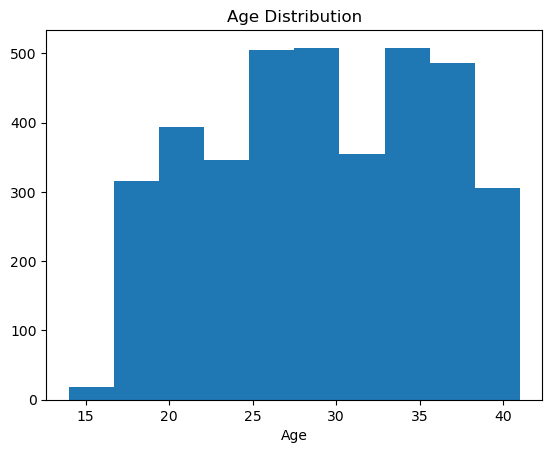

In [82]:
plt.hist(overall['Age'])
plt.title("Age Distribution")
plt.xlabel('Age')
plt.show()

In [39]:
bat_style = overall.groupby('Batting Style').count().reset_index()[['Batting Style','Full Name']]
bat_style


,Batting Style,Full Name
0,Left hand Bat,918
1,Right hand Bat,2797


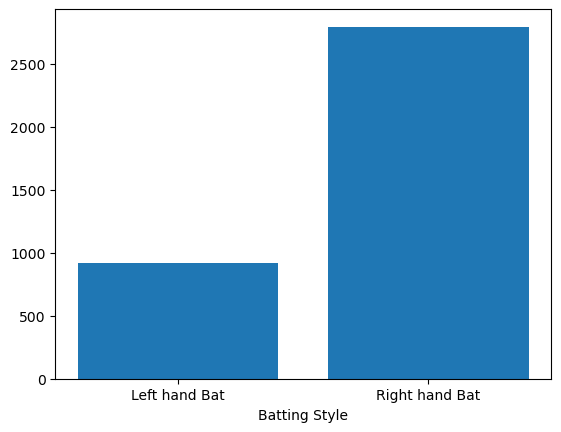

In [117]:
plt.bar(bat_style['Batting Style'], bat_style['Full Name'])
plt.xlabel('Batting Style')
plt.show()

In [41]:
bow_style = overall.groupby('Bowling Style').count().reset_index()[['Bowling Style','Full Name']]
bow_style 

,Bowling Style,Full Name
0,Left arm Bowler,2
1,Left arm Fast,19
2,Left arm Fast medium,60
3,"Left arm Fast medium, Slow Left arm Orthodox",1
4,Left arm Medium,65
5,Left arm Medium fast,72
6,"Left arm Medium, Slow Left arm Orthodox",3
7,Left arm Slow,9
8,Left arm Slow medium,2
9,Left arm Wrist spin,18


In [42]:
bow_style = bow_style[bow_style['Full Name'] > 20].sort_values('Full Name',ascending=False)

In [85]:
bow_style['Bowling Style'].values

array(['Right arm Offbreak', 'Right arm Medium', 'Slow Left arm Orthodox',
       'Right arm Medium fast', 'Right arm Fast medium', 'Legbreak',
       'Right arm Fast', 'Legbreak Googly', 'Left arm Medium fast',
       'Left arm Medium', 'Left arm Fast medium'], dtype=object)

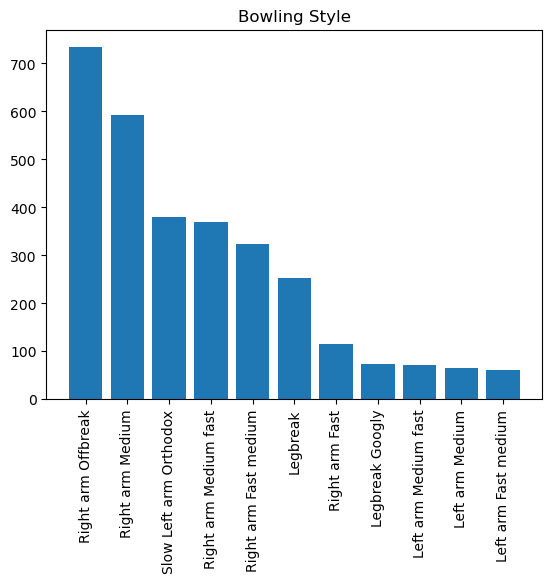

In [43]:
plt.bar(bow_style['Bowling Style'], bow_style['Full Name'])
plt.xticks(rotation = 90)
plt.title('Bowling Style')
plt.show()

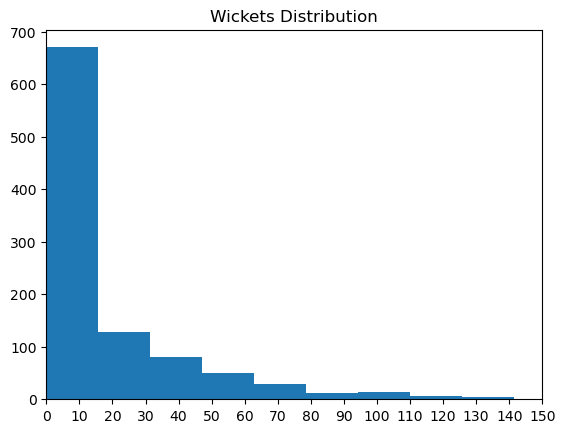

In [44]:
plt.hist(overall['wickets'])
plt.title("Wickets Distribution")
plt.xlim([0, 150])
plt.xticks([0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150])
plt.show()

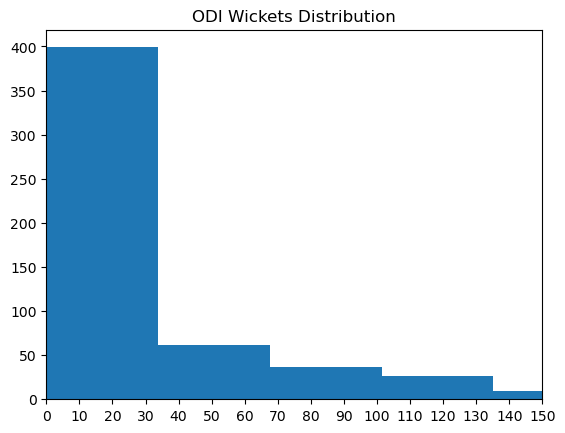

In [91]:
plt.hist(odi_df['bow_Wkts'])
plt.title("ODI Wickets Distribution")
plt.xlim([0, 150])
plt.xticks([0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150])
plt.show()

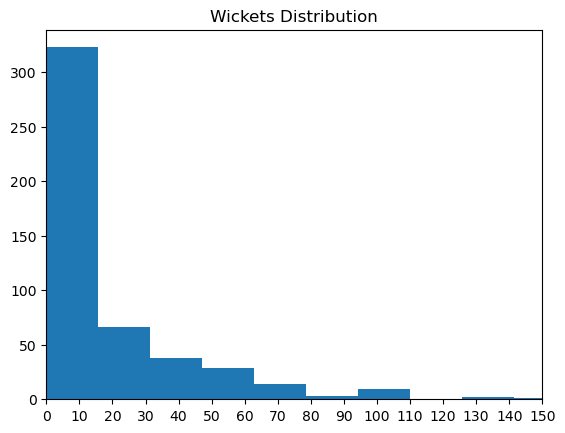

In [88]:
plt.hist(t20i_df['bow_Wkts'])
plt.title("Wickets Distribution")
plt.xlim([0, 150])
plt.xticks([0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150])
plt.show()

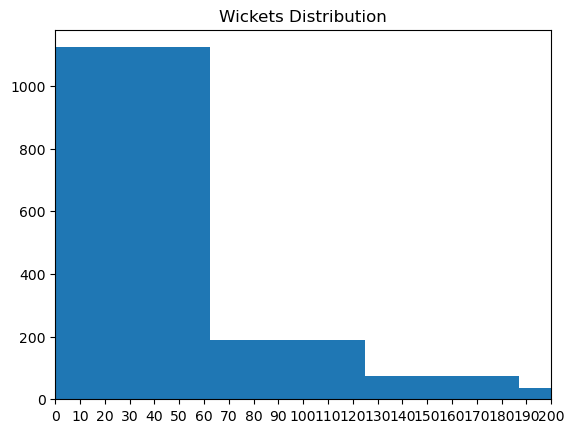

In [92]:
plt.hist(t20s_df['bow_Wkts'])
plt.title("Wickets Distribution")
plt.xlim([0, 150])
plt.xticks([0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200])
plt.show()

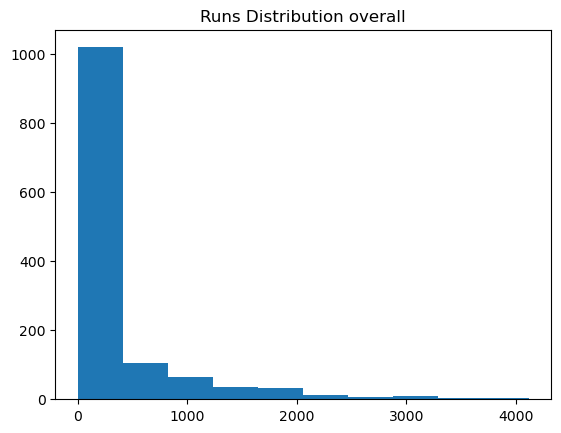

In [45]:
plt.hist(overall['runs'])
plt.title("Runs Distribution overall")
plt.show()

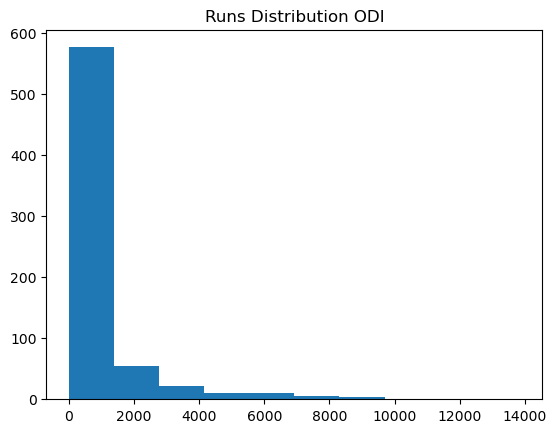

In [118]:
plt.hist(odi_df['bat_Runs'])
plt.title("Runs Distribution ODI")
plt.show()

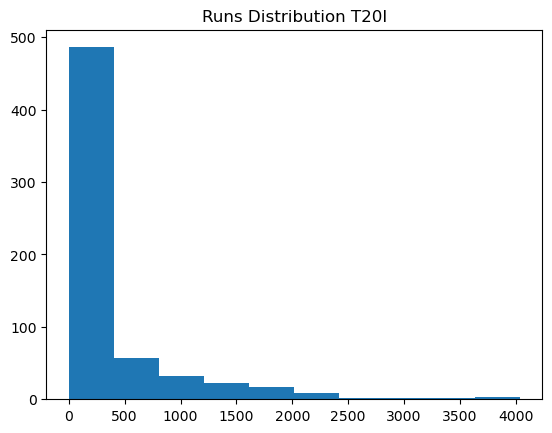

In [119]:
plt.hist(t20i_df['bat_Runs'])
plt.title("Runs Distribution T20I")
plt.show()

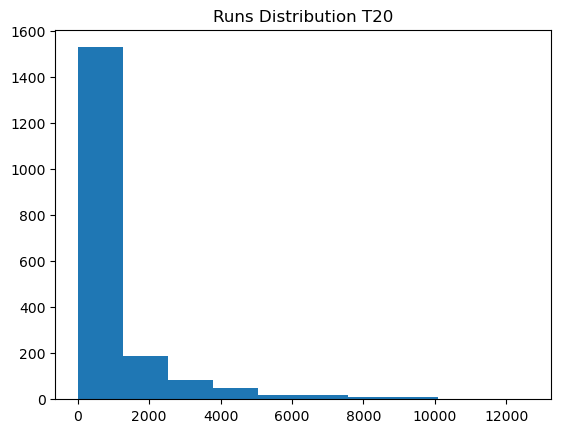

In [120]:
plt.hist(t20s_df['bat_Runs'])
plt.title("Runs Distribution T20")
plt.show()

In [46]:
overall.sort_values('runs', ascending=False).loc[:, ['Full Name','runs']].head()

,Full Name,runs
1880,Suzannah Wilson Bates,4118.0
1429,Virat Kohli,4037.0
1615,Rohit Gurunath Sharma,3974.0
2438,Mohammad Babar Azam,3698.0
1961,Martin James Guptill,3531.0


In [47]:
odi_df.sort_values('bat_Runs', ascending=False).loc[:, ['Full Name','bat_Runs']].head()

,Full Name,bat_Runs
181,Virat Kohli,13848.0
226,Rohit Gurunath Sharma,10709.0
495,Abraham Benjamin de Villiers,9577.0
343,Luteru Ross Poutoa Lote Taylor,8607.0
73,Tamim Iqbal Khan,8357.0


In [48]:
t20i_df.sort_values('bat_Runs', ascending=False).loc[:, ['Full Name','bat_Runs']].head()

,Full Name,bat_Runs
173,Virat Kohli,4037.0
219,Rohit Gurunath Sharma,3974.0
417,Mohammad Babar Azam,3698.0
308,Martin James Guptill,3531.0
275,Paul Robert Stirling,3438.0


In [49]:
t20s_df.sort_values('bat_Runs', ascending=False).loc[:, ['Full Name','bat_Runs']].head()

,Full Name,bat_Runs
1942,Kieron Adrian Pollard,12625.0
274,Alexander Daniel Hales,11996.0
551,Virat Kohli,11994.0
672,Rohit Gurunath Sharma,11156.0
215,Joseph Charles Buttler,11098.0


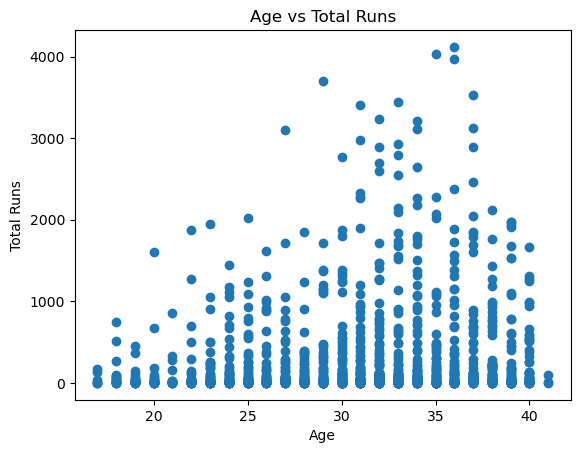

In [97]:
plt.scatter(overall['Age'], overall['runs'])
plt.xlabel("Age")
plt.ylabel('Total Runs')
plt.title('Age vs Total Runs')
plt.show()

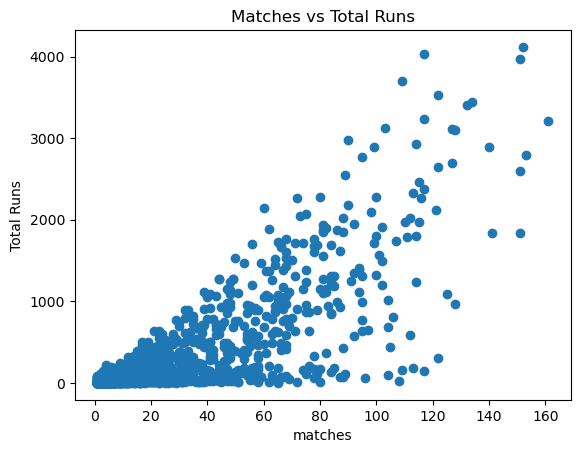

In [50]:
plt.scatter(overall['matches'], overall['runs'])
plt.xlabel("matches")
plt.ylabel('Total Runs')
plt.title('Matches vs Total Runs')
plt.show()

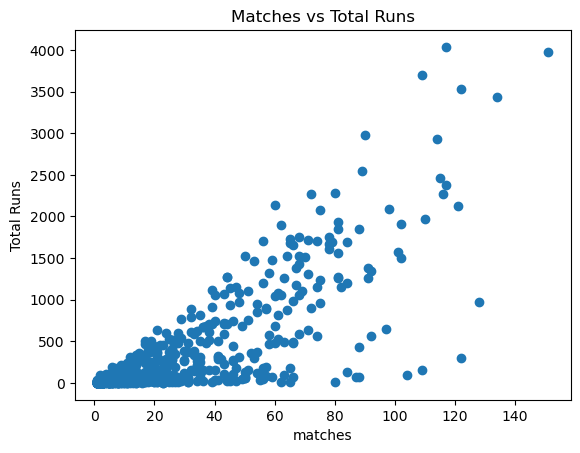

In [51]:
plt.scatter(t20i_df['matches'], t20i_df['bat_Runs'])
plt.xlabel("matches")
plt.ylabel('Total Runs')
plt.title('Matches vs Total Runs')
plt.show()

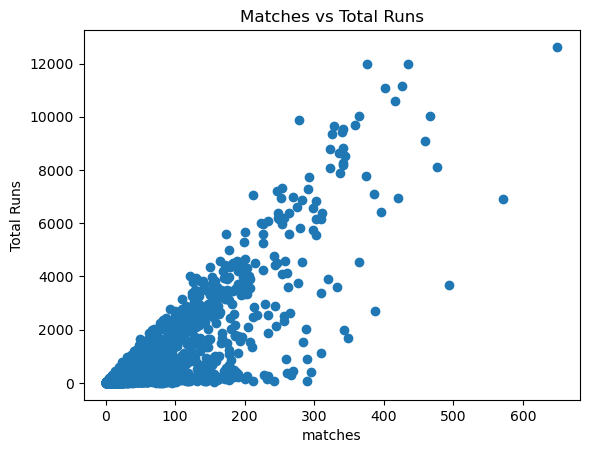

In [52]:
plt.scatter(t20s_df['matches'], t20s_df['bat_Runs'])
plt.xlabel("matches")
plt.ylabel('Total Runs')
plt.title('Matches vs Total Runs')
plt.show()

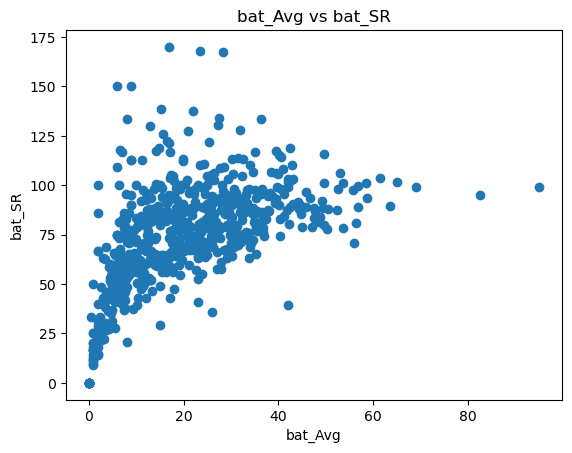

In [53]:
plt.scatter(odi_df['bat_Ave'], odi_df['bat_SR'])
plt.xlabel('bat_Avg')
plt.ylabel('bat_SR')
plt.title('bat_Avg vs bat_SR')
plt.show()

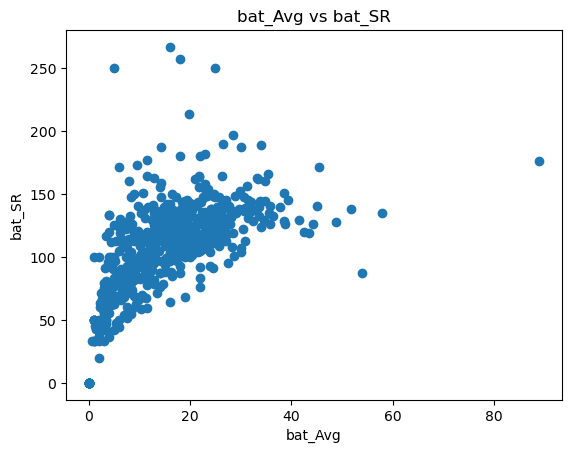

In [54]:
plt.scatter(t20i_df['bat_Ave'], t20i_df['bat_SR'])
plt.xlabel('bat_Avg')
plt.ylabel('bat_SR')
plt.title('bat_Avg vs bat_SR')
plt.show()

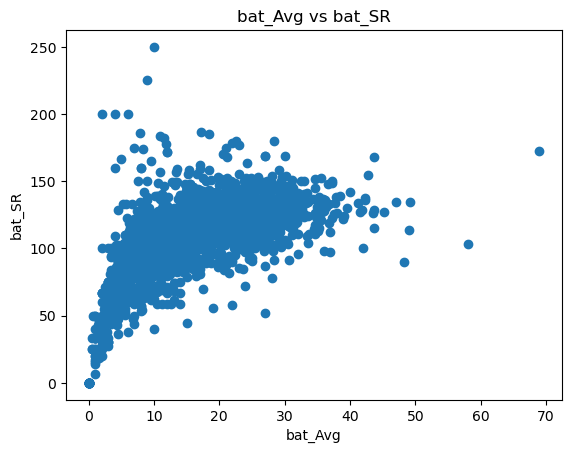

In [55]:
plt.scatter(t20s_df['bat_Ave'], t20s_df['bat_SR'])
plt.xlabel('bat_Avg')
plt.ylabel('bat_SR')
plt.title('bat_Avg vs bat_SR')
plt.show()

## Bowlers

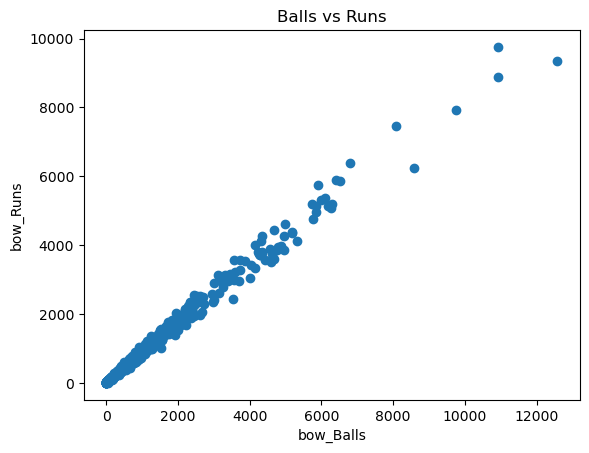

In [56]:
plt.scatter(odi_df['bow_Balls'], odi_df['bow_Runs'])
plt.xlabel('bow_Balls')
plt.ylabel('bow_Runs')
plt.title('Balls vs Runs')
plt.show()

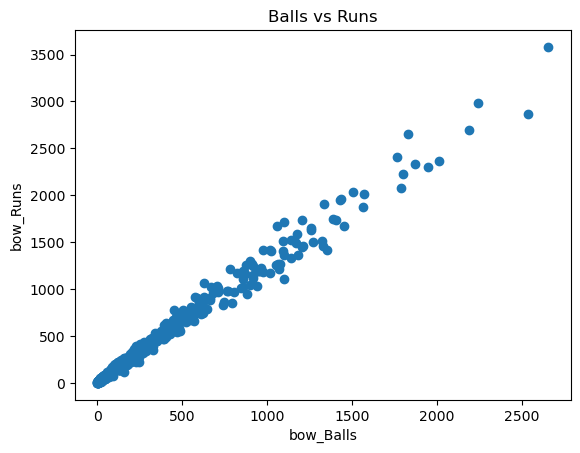

In [57]:
plt.scatter(t20i_df['bow_Balls'], t20i_df['bow_Runs'])
plt.xlabel('bow_Balls')
plt.ylabel('bow_Runs')
plt.title('Balls vs Runs')
plt.show()

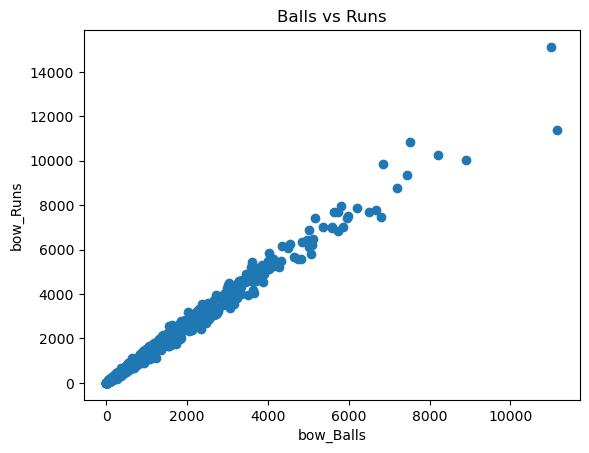

In [58]:
plt.scatter(t20s_df['bow_Balls'], t20s_df['bow_Runs'])
plt.xlabel('bow_Balls')
plt.ylabel('bow_Runs')
plt.title('Balls vs Runs')
plt.show()

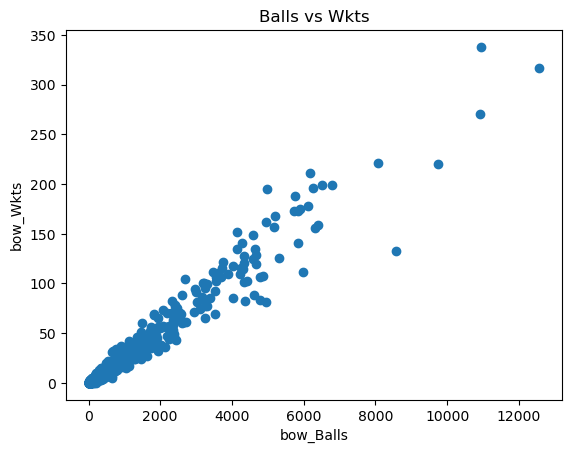

In [59]:
plt.scatter(odi_df['bow_Balls'], odi_df['bow_Wkts'])
plt.xlabel('bow_Balls')
plt.ylabel('bow_Wkts')
plt.title('Balls vs Wkts')
plt.show()

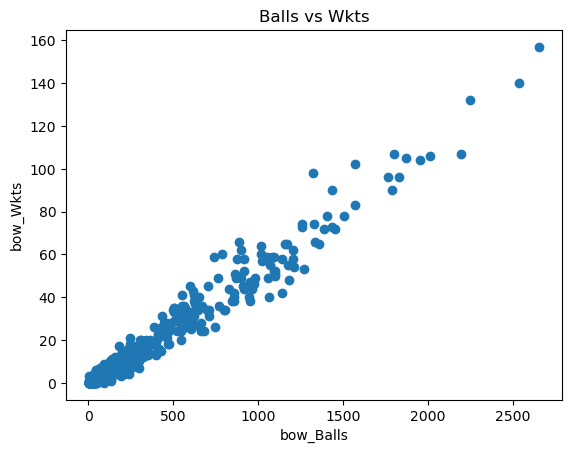

In [60]:
plt.scatter(t20i_df['bow_Balls'], t20i_df['bow_Wkts'])
plt.xlabel('bow_Balls')
plt.ylabel('bow_Wkts')
plt.title('Balls vs Wkts')
plt.show()

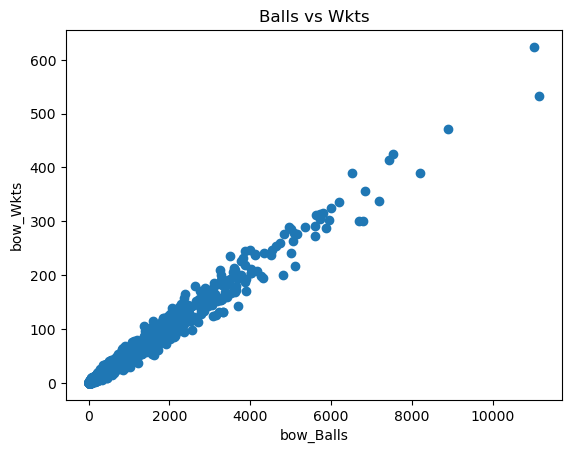

In [61]:
plt.scatter(t20s_df['bow_Balls'], t20s_df['bow_Wkts'])
plt.xlabel('bow_Balls')
plt.ylabel('bow_Wkts')
plt.title('Balls vs Wkts')
plt.show()

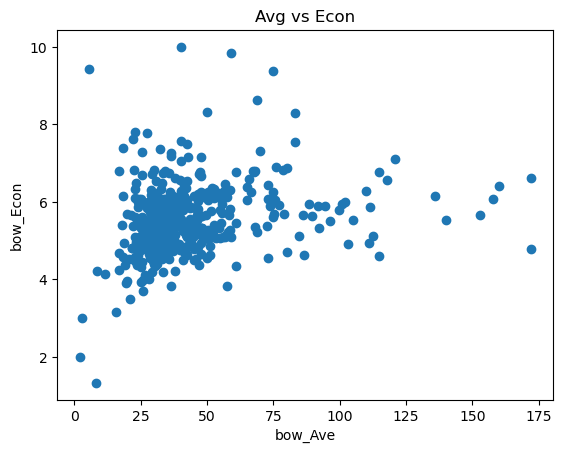

In [62]:
plt.scatter(odi_df['bow_Ave'], odi_df['bow_Econ'])
plt.xlabel('bow_Ave')
plt.ylabel('bow_Econ')
plt.title('Avg vs Econ')
plt.show()

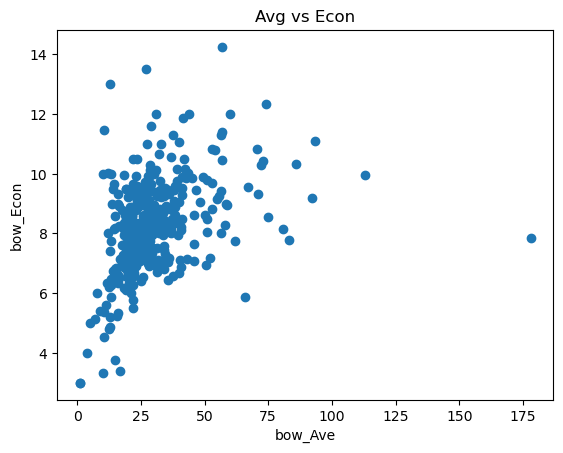

In [63]:
plt.scatter(t20i_df['bow_Ave'], t20i_df['bow_Econ'])
plt.xlabel('bow_Ave')
plt.ylabel('bow_Econ')
plt.title('Avg vs Econ')
plt.show()

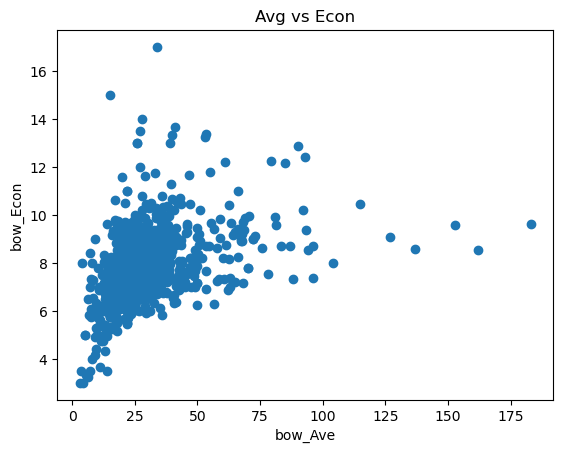

In [64]:
plt.scatter(t20s_df['bow_Ave'], t20s_df['bow_Econ'])
plt.xlabel('bow_Ave')
plt.ylabel('bow_Econ')
plt.title('Avg vs Econ')
plt.show()

# Standout Performance

In [65]:
odi_df.sort_values('bat_Runs', ascending=False).head(10)

,Full Name,matches,Inns,bat_NO,bat_Runs,bat_HS,bat_Ave,bat_BF,bat_SR,bat_100s,...,bow_Runs,bow_Wkts,bow_BBI,bow_BBM,bow_Ave,bow_Econ,bow_SR,bow_4w,bow_5w,bow_10w
181,Virat Kohli,292,280.0,44.0,13848.0,183.0,58.67,14797.0,93.58,50.0,...,680.0,5.0,1/13,1/13,136.00,6.16,132.4,0.0,0.0,0.0
226,Rohit Gurunath Sharma,262,254.0,36.0,10709.0,264.0,49.12,11644.0,91.97,31.0,...,522.0,9.0,2/27,2/27,58.00,5.23,66.4,0.0,0.0,0.0
495,Abraham Benjamin de Villiers,228,218.0,39.0,9577.0,176.0,53.50,9473.0,101.09,25.0,...,202.0,7.0,2/15,2/15,28.85,6.31,27.4,0.0,0.0,0.0
343,Luteru Ross Poutoa Lote Taylor,236,220.0,39.0,8607.0,181.0,47.55,10330.0,83.32,21.0,...,35.0,0.0,-,-,NaN,5.00,NaN,0.0,0.0,0.0
73,Tamim Iqbal Khan,243,240.0,12.0,8357.0,158.0,36.65,10642.0,78.52,14.0,...,13.0,0.0,-,-,NaN,13.00,NaN,0.0,0.0,0.0
487,Hashim Mahomed Amla,181,178.0,14.0,8113.0,159.0,49.46,9178.0,88.39,27.0,...,NaN,NaN,-,-,NaN,NaN,NaN,NaN,NaN,NaN
123,Eoin Joseph Gerard Morgan,248,230.0,34.0,7701.0,148.0,39.29,8447.0,91.16,14.0,...,NaN,NaN,-,-,NaN,NaN,NaN,NaN,NaN,NaN
39,Mohammad Mushfiqur Rahim,268,250.0,40.0,7657.0,144.0,36.46,9623.0,79.56,9.0,...,NaN,NaN,-,-,NaN,NaN,NaN,NaN,NaN,NaN
60,Shakib Al Hasan,247,234.0,31.0,7570.0,134.0,37.29,9138.0,82.84,9.0,...,9360.0,317.0,5/29,5/29,29.52,4.46,39.6,10.0,4.0,0.0
315,Martin James Guptill,198,195.0,19.0,7346.0,237.0,41.73,8415.0,87.29,18.0,...,98.0,4.0,2/6,2/6,24.50,5.39,27.2,0.0,0.0,0.0


In [66]:
t20i_df.sort_values('bat_Runs', ascending=False).head(10)

,Full Name,matches,Inns,bat_NO,bat_Runs,bat_HS,bat_Ave,bat_BF,bat_SR,bat_100s,...,bow_Runs,bow_Wkts,bow_BBI,bow_BBM,bow_Ave,bow_Econ,bow_SR,bow_4w,bow_5w,bow_10w
173,Virat Kohli,117,109.0,31.0,4037.0,122.0,51.75,2922.0,138.15,1.0,...,204.0,4.0,1/13,1/13,51.00,8.05,38.0,0.0,0.0,0.0
219,Rohit Gurunath Sharma,151,143.0,18.0,3974.0,121.0,31.79,2839.0,139.97,5.0,...,113.0,1.0,1/22,1/22,113.00,9.97,68.0,0.0,0.0,0.0
417,Mohammad Babar Azam,109,103.0,14.0,3698.0,NaN,41.55,2864.0,129.12,3.0,...,NaN,NaN,-,-,NaN,NaN,NaN,NaN,NaN,NaN
308,Martin James Guptill,122,118.0,7.0,3531.0,105.0,31.81,2602.0,135.70,2.0,...,11.0,0.0,-,-,NaN,11.00,NaN,0.0,0.0,0.0
275,Paul Robert Stirling,134,133.0,11.0,3438.0,115.0,28.18,2533.0,135.72,1.0,...,679.0,20.0,3/21,3/21,33.95,7.46,27.3,0.0,0.0,0.0
445,Mohammad Rizwan,90,78.0,17.0,2981.0,104.0,48.86,2337.0,127.55,1.0,...,NaN,NaN,-,-,NaN,NaN,NaN,NaN,NaN,NaN
101,Joseph Charles Buttler,114,105.0,21.0,2927.0,101.0,34.84,2024.0,144.61,1.0,...,NaN,NaN,-,-,NaN,NaN,NaN,NaN,NaN,NaN
341,Kane Stuart Williamson,89,87.0,12.0,2547.0,95.0,33.96,2060.0,123.64,0.0,...,164.0,6.0,2/16,2/16,27.33,8.33,19.6,0.0,0.0,0.0
127,Eoin Joseph Gerard Morgan,115,107.0,21.0,2458.0,91.0,28.58,1805.0,136.17,0.0,...,NaN,NaN,-,-,NaN,NaN,NaN,NaN,NaN,NaN
67,Shakib Al Hasan,117,116.0,16.0,2382.0,84.0,23.82,1946.0,122.40,0.0,...,2869.0,140.0,5/20,5/20,20.49,6.79,18.1,5.0,2.0,0.0


In [67]:
t20s_df.sort_values('bat_Runs', ascending=False).head(10)

,Full Name,matches,Inns,bat_NO,bat_Runs,bat_HS,bat_Ave,bat_BF,bat_SR,bat_100s,...,bow_Runs,bow_Wkts,bow_BBI,bow_BBM,bow_Ave,bow_Econ,bow_SR,bow_4w,bow_5w,bow_10w
1942,Kieron Adrian Pollard,649,576.0,171.0,12625.0,104.0,31.17,8365.0,150.92,1.0,...,7969.0,316.0,4/15,4/15,25.21,8.23,18.3,7.0,0.0,0.0
274,Alexander Daniel Hales,434,431.0,31.0,11996.0,119.0,29.99,8187.0,146.52,6.0,...,7.0,0.0,-,-,NaN,14.00,NaN,0.0,0.0,0.0
551,Virat Kohli,376,359.0,68.0,11994.0,122.0,41.21,8989.0,133.42,8.0,...,667.0,8.0,2/25,2/25,83.37,8.70,57.5,0.0,0.0,0.0
672,Rohit Gurunath Sharma,426,413.0,50.0,11156.0,121.0,30.73,8336.0,133.82,7.0,...,830.0,29.0,4/6,4/6,28.62,7.84,21.8,1.0,0.0,0.0
215,Joseph Charles Buttler,401,378.0,58.0,11098.0,124.0,34.68,7673.0,144.63,6.0,...,NaN,NaN,-,-,NaN,NaN,NaN,NaN,NaN,NaN
887,Colin Munro,416,397.0,49.0,10602.0,114.0,30.46,7500.0,141.35,5.0,...,1017.0,31.0,4/15,4/15,32.80,9.21,21.3,1.0,0.0,0.0
1425,David Andrew Miller,466,423.0,139.0,10019.0,120.0,35.27,7249.0,138.21,4.0,...,31.0,0.0,-,-,NaN,10.33,NaN,0.0,0.0,0.0
410,James Michael Vince,365,354.0,38.0,10018.0,129.0,31.70,7392.0,135.52,5.0,...,87.0,3.0,1/5,1/5,29.00,6.69,26.0,0.0,0.0,0.0
1124,Mohammad Babar Azam,278,268.0,42.0,9879.0,NaN,43.71,7673.0,128.75,10.0,...,85.0,4.0,2/20,2/20,21.25,6.53,19.5,0.0,0.0,0.0
1366,Francois du Plessis,358,338.0,38.0,9687.0,120.0,32.29,7246.0,133.68,5.0,...,917.0,50.0,5/19,5/19,18.34,6.96,15.8,1.0,2.0,0.0


In [68]:
odi_df.sort_values('bow_Wkts', ascending=False).head(10)

,Full Name,matches,Inns,bat_NO,bat_Runs,bat_HS,bat_Ave,bat_BF,bat_SR,bat_100s,...,bow_Runs,bow_Wkts,bow_BBI,bow_BBM,bow_Ave,bow_Econ,bow_SR,bow_4w,bow_5w,bow_10w
590,Separamadu Lasith Malinga,226,119.0,36.0,567.0,56.0,6.83,761.0,74.50,0.0,...,9760.0,338.0,6/38,6/38,28.87,5.35,32.3,11.0,8.0,0.0
60,Shakib Al Hasan,247,234.0,31.0,7570.0,134.0,37.29,9138.0,82.84,9.0,...,9360.0,317.0,5/29,5/29,29.52,4.46,39.6,10.0,4.0,0.0
28,Mashrafe Bin Mortaza,220,158.0,28.0,1787.0,51.0,13.74,2041.0,87.55,0.0,...,8893.0,270.0,6/26,6/26,32.93,4.88,40.4,7.0,1.0,0.0
342,Timothy Grant Southee,161,96.0,35.0,740.0,55.0,12.13,771.0,95.97,0.0,...,7448.0,221.0,7/33,7/33,33.70,5.53,36.5,5.0,3.0,0.0
176,Ravindrasinh Anirudhsinh Jadeja,197,132.0,47.0,2756.0,87.0,32.42,3240.0,85.06,0.0,...,7936.0,220.0,5/33,5/33,36.07,4.88,44.3,7.0,2.0,0.0
299,Trent Alexander Boult,114,52.0,28.0,216.0,21.0,9.00,279.0,77.41,0.0,...,5146.0,211.0,7/34,7/34,24.38,4.99,29.2,10.0,6.0,0.0
638,Dwayne John Bravo,164,141.0,24.0,2968.0,112.0,25.36,3606.0,82.30,2.0,...,5874.0,199.0,6/43,6/43,29.51,5.41,32.7,6.0,1.0,0.0
131,Adil Usman Rashid,135,68.0,23.0,826.0,69.0,18.35,839.0,98.45,0.0,...,6377.0,199.0,5/27,5/27,32.04,5.63,34.1,8.0,2.0,0.0
535,Dale Willem Steyn,125,51.0,12.0,365.0,60.0,9.35,562.0,64.94,0.0,...,5087.0,196.0,6/39,6/39,25.95,4.87,31.9,4.0,3.0,0.0
187,Mohammed Shami Ahmed,101,48.0,20.0,220.0,25.0,7.85,265.0,83.01,0.0,...,4618.0,195.0,7/57,7/57,23.68,5.55,25.5,10.0,5.0,0.0


In [69]:
t20i_df.sort_values('bow_Wkts', ascending=False).head(10)

,Full Name,matches,Inns,bat_NO,bat_Runs,bat_HS,bat_Ave,bat_BF,bat_SR,bat_100s,...,bow_Runs,bow_Wkts,bow_BBI,bow_BBM,bow_Ave,bow_Econ,bow_SR,bow_4w,bow_5w,bow_10w
336,Timothy Grant Southee,122,49.0,23.0,303.0,39.0,11.65,217.0,139.63,0.0,...,3583.0,157.0,5/18,5/18,22.82,8.09,16.9,2.0,2.0,0.0
67,Shakib Al Hasan,117,116.0,16.0,2382.0,84.0,23.82,1946.0,122.40,0.0,...,2869.0,140.0,5/20,5/20,20.49,6.79,18.1,5.0,2.0,0.0
335,Inderbir Singh Sodhi,109,33.0,12.0,161.0,19.0,7.66,150.0,107.33,0.0,...,2984.0,132.0,4/28,4/28,22.60,7.97,17.0,3.0,0.0,0.0
132,Adil Usman Rashid,104,33.0,16.0,101.0,22.0,5.94,119.0,84.87,0.0,...,2698.0,107.0,4/2,4/2,25.21,7.38,20.4,2.0,0.0,0.0
591,Separamadu Lasith Malinga,84,33.0,12.0,136.0,27.0,6.47,161.0,84.47,0.0,...,2225.0,107.0,5/6,5/6,20.79,7.42,16.8,1.0,2.0,0.0
331,Mitchell Josef Santner,97,67.0,28.0,643.0,77.0,16.48,519.0,123.89,0.0,...,2364.0,106.0,4/11,4/11,22.30,7.04,18.9,3.0,0.0,0.0
41,Mustafizur Rahman,88,25.0,10.0,71.0,15.0,4.73,93.0,76.34,0.0,...,2338.0,105.0,5/22,5/22,22.26,7.50,17.8,3.0,1.0,0.0
464,Shadab Khan,92,43.0,13.0,569.0,NaN,18.96,413.0,137.77,0.0,...,2301.0,104.0,4/8,4/8,22.12,7.07,18.7,3.0,0.0,0.0
242,Mark Richard Adair,74,51.0,11.0,567.0,NaN,14.17,466.0,121.67,0.0,...,2011.0,102.0,4/13,4/13,19.71,7.68,15.4,3.0,0.0,0.0
577,Pinnaduwage Wanindu Hasaranga de Silva,61,51.0,12.0,533.0,71.0,13.66,433.0,123.09,0.0,...,1513.0,98.0,4/9,4/9,15.43,6.85,13.5,3.0,0.0,0.0


In [70]:
t20s_df.sort_values('bow_Wkts', ascending=False).head(10)

,Full Name,matches,Inns,bat_NO,bat_Runs,bat_HS,bat_Ave,bat_BF,bat_SR,bat_100s,...,bow_Runs,bow_Wkts,bow_BBI,bow_BBM,bow_Ave,bow_Econ,bow_SR,bow_4w,bow_5w,bow_10w
1856,Dwayne John Bravo,571,437.0,128.0,6927.0,70.0,22.41,5517.0,125.55,0.0,...,15126.0,624.0,5/23,5/23,24.24,8.24,17.6,11.0,2.0,0.0
1929,Sunil Philip Narine,493,309.0,60.0,3698.0,79.0,14.85,2525.0,146.45,0.0,...,11397.0,532.0,5/19,5/19,21.42,6.12,20.9,12.0,1.0,0.0
129,Shakib Al Hasan,420,385.0,57.0,6958.0,89.0,21.21,5605.0,124.13,0.0,...,10034.0,471.0,6/6,6/6,21.30,6.77,18.8,10.0,5.0,0.0
1954,Andre Dwayne Russell,477,412.0,112.0,8100.0,121.0,27.00,4792.0,169.03,2.0,...,10845.0,424.0,5/15,5/15,25.57,8.65,17.7,9.0,1.0,0.0
1297,Wahab Riaz,348,203.0,77.0,1700.0,53.0,13.49,1308.0,129.96,0.0,...,9350.0,413.0,5/8,5/8,22.63,7.54,17.9,5.0,3.0,0.0
1704,Separamadu Lasith Malinga,295,92.0,39.0,426.0,37.0,8.03,414.0,102.89,0.0,...,7679.0,390.0,6/7,6/7,19.68,7.07,16.6,10.0,5.0,0.0
1275,Sohail Tanvir,388,248.0,87.0,2703.0,74.0,16.78,2242.0,120.56,0.0,...,10256.0,389.0,6/14,6/14,26.36,7.49,21.1,7.0,2.0,0.0
302,Christopher James Jordan,343,204.0,82.0,2007.0,73.0,16.45,1528.0,131.34,0.0,...,9835.0,356.0,4/6,4/6,27.62,8.61,19.2,6.0,0.0,0.0
347,Samit Rohit Patel,396,327.0,69.0,6422.0,90.0,24.89,5166.0,124.31,0.0,...,8748.0,337.0,4/5,4/5,25.95,7.30,21.3,3.0,0.0,0.0
474,Yuzvendra Singh Chahal,290,42.0,26.0,79.0,10.0,4.93,149.0,53.02,0.0,...,7862.0,336.0,6/25,6/25,23.39,7.61,18.4,9.0,2.0,0.0


## Consistent Performers

In [71]:
odi_df.sort_values('bat_Ave', ascending=False).head(10)

,Full Name,matches,Inns,bat_NO,bat_Runs,bat_HS,bat_Ave,bat_BF,bat_SR,bat_100s,...,bow_Runs,bow_Wkts,bow_BBI,bow_BBM,bow_Ave,bow_Econ,bow_SR,bow_4w,bow_5w,bow_10w
408,Aamer Yamin,4,3.0,2.0,95.0,62.0,95.00,96.0,98.95,0.0,...,154.0,2.0,1/38,1/38,77.00,5.92,78.0,0.0,0.0,0.0
49,Quazi Nurul Hasan,7,5.0,3.0,165.0,45.0,82.50,174.0,94.82,0.0,...,NaN,NaN,-,-,NaN,NaN,NaN,NaN,NaN,NaN
496,Tony de Zorzi,5,5.0,1.0,276.0,119.0,69.00,279.0,98.92,1.0,...,NaN,NaN,-,-,NaN,NaN,NaN,NaN,NaN,NaN
197,Krunal Himanshu Pandya,5,4.0,2.0,130.0,58.0,65.00,128.0,101.56,0.0,...,223.0,2.0,1/26,1/26,111.50,5.86,114.0,0.0,0.0,0.0
215,Bhardwaj Sai Sudharsan,3,3.0,1.0,127.0,NaN,63.50,142.0,89.43,0.0,...,8.0,0.0,-,-,NaN,16.00,NaN,0.0,0.0,0.0
228,Shubman Gill,44,44.0,7.0,2271.0,208.0,61.37,2195.0,103.46,6.0,...,11.0,0.0,-,-,NaN,5.50,NaN,0.0,0.0,0.0
181,Virat Kohli,292,280.0,44.0,13848.0,183.0,58.67,14797.0,93.58,50.0,...,680.0,5.0,1/13,1/13,136.00,6.16,132.4,0.0,0.0,0.0
111,Lewis Gregory,3,2.0,0.0,117.0,77.0,58.50,116.0,100.86,0.0,...,97.0,4.0,3/44,3/44,24.25,5.10,28.5,0.0,0.0,0.0
419,Mohammad Babar Azam,117,114.0,13.0,5729.0,NaN,56.72,6455.0,88.75,19.0,...,NaN,NaN,-,-,NaN,NaN,NaN,NaN,NaN,NaN
218,Sanju Viswanath Samson,16,14.0,5.0,510.0,108.0,56.66,512.0,99.60,1.0,...,NaN,NaN,-,-,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
t20i_df.sort_values('bat_Ave', ascending=False).head(10)

,Full Name,matches,Inns,bat_NO,bat_Runs,bat_HS,bat_Ave,bat_BF,bat_SR,bat_100s,...,bow_Runs,bow_Wkts,bow_BBI,bow_BBM,bow_Ave,bow_Econ,bow_SR,bow_4w,bow_5w,bow_10w
223,Rinku Khanchand Singh,15,11.0,7.0,356.0,69.0,89.00,202.0,176.23,0.0,...,NaN,NaN,-,-,NaN,NaN,NaN,NaN,NaN,NaN
0,Abu Hider Rony,13,5.0,4.0,58.0,22.0,58.00,43.0,134.88,0.0,...,330.0,6.0,2/40,2/40,55.00,9.16,36.0,0.0,0.0,0.0
608,Subasinghe Mudiyanselage Ashan Priyanjan,3,3.0,2.0,54.0,40.0,54.00,62.0,87.09,0.0,...,NaN,NaN,-,-,NaN,NaN,NaN,NaN,NaN,NaN
173,Virat Kohli,117,109.0,31.0,4037.0,122.0,51.75,2922.0,138.15,1.0,...,204.0,4.0,1/13,1/13,51.00,8.05,38.0,0.0,0.0,0.0
445,Mohammad Rizwan,90,78.0,17.0,2981.0,104.0,48.86,2337.0,127.55,1.0,...,NaN,NaN,-,-,NaN,NaN,NaN,NaN,NaN,NaN
239,Suryakumar Ashok Yadav,60,57.0,10.0,2141.0,117.0,45.55,1248.0,171.55,4.0,...,NaN,NaN,-,-,NaN,NaN,NaN,NaN,NaN,NaN
342,George Herrick Worker,2,2.0,0.0,90.0,NaN,45.00,64.0,140.62,0.0,...,19.0,1.0,1/19,1/19,19.00,9.50,12.0,0.0,0.0,0.0
189,Manish Krishnanand Pandey,39,33.0,17.0,709.0,79.0,44.31,562.0,126.15,0.0,...,NaN,NaN,-,-,NaN,NaN,NaN,NaN,NaN,NaN
178,Mandeep Singh,3,3.0,1.0,87.0,52.0,43.50,73.0,119.17,0.0,...,NaN,NaN,-,-,NaN,NaN,NaN,NaN,NaN,NaN
668,Ashley Renaldo Nurse,13,8.0,6.0,85.0,20.0,42.50,71.0,119.71,0.0,...,318.0,8.0,2/6,2/6,39.75,7.95,30.0,0.0,0.0,0.0


In [73]:
t20s_df.sort_values('bat_Ave', ascending=False).head(10)

,Full Name,matches,Inns,bat_NO,bat_Runs,bat_HS,bat_Ave,bat_BF,bat_SR,bat_100s,...,bow_Runs,bow_Wkts,bow_BBI,bow_BBM,bow_Ave,bow_Econ,bow_SR,bow_4w,bow_5w,bow_10w
696,Kaushal Sunil Tambe,3,3.0,2.0,69.0,62.0,69.00,40.0,172.50,0.0,...,15.0,0.0,-,-,NaN,15.00,NaN,0.0,0.0,0.0
1868,Rivaldo A Clarke,6,2.0,1.0,58.0,54.0,58.00,56.0,103.57,0.0,...,NaN,NaN,-,-,NaN,NaN,NaN,NaN,NaN,NaN
655,Sameer Rizvi,11,9.0,3.0,295.0,75.0,49.16,219.0,134.70,0.0,...,NaN,NaN,-,-,NaN,NaN,NaN,NaN,NaN,NaN
850,Brent R. Findlay,5,3.0,2.0,49.0,NaN,49.00,43.0,113.95,0.0,...,81.0,5.0,2/10,2/10,16.20,6.75,14.4,0.0,0.0,0.0
1701,Hewa Lunuwilage Promod Maduwantha,14,7.0,4.0,145.0,38.0,48.33,161.0,90.06,0.0,...,109.0,9.0,2/8,2/8,12.11,4.73,15.3,0.0,0.0,0.0
360,James Edward Kenneth Rew,1,1.0,0.0,47.0,NaN,47.00,35.0,134.28,0.0,...,NaN,NaN,-,-,NaN,NaN,NaN,NaN,NaN,NaN
490,Yash Vijay Dhull,19,18.0,5.0,588.0,73.0,45.23,462.0,127.27,0.0,...,NaN,NaN,-,-,NaN,NaN,NaN,NaN,NaN,NaN
1124,Mohammad Babar Azam,278,268.0,42.0,9879.0,NaN,43.71,7673.0,128.75,10.0,...,85.0,4.0,2/20,2/20,21.25,6.53,19.5,0.0,0.0,0.0
1537,David John White,23,23.0,5.0,786.0,87.0,43.66,683.0,115.08,0.0,...,57.0,5.0,2/16,2/16,11.40,4.75,14.4,0.0,0.0,0.0
1554,Paulu Saramge Roshan Anurudda,8,5.0,2.0,131.0,67.0,43.66,78.0,167.94,0.0,...,24.0,0.0,-,-,NaN,24.00,NaN,0.0,0.0,0.0


In [74]:
odi_df.sort_values('bow_Econ', ascending=False).head(10)

,Full Name,matches,Inns,bat_NO,bat_Runs,bat_HS,bat_Ave,bat_BF,bat_SR,bat_100s,...,bow_Runs,bow_Wkts,bow_BBI,bow_BBM,bow_Ave,bow_Econ,bow_SR,bow_4w,bow_5w,bow_10w
504,Colin Alexander Ingram,31,29.0,3.0,843.0,124.0,32.42,1024.0,82.32,3.0,...,17.0,0.0,-,-,NaN,17.0,NaN,0.0,0.0,0.0
215,Bhardwaj Sai Sudharsan,3,3.0,1.0,127.0,NaN,63.50,142.0,89.43,0.0,...,8.0,0.0,-,-,NaN,16.0,NaN,0.0,0.0,0.0
645,Johnson Charles,58,58.0,0.0,1537.0,NaN,26.50,1803.0,85.24,2.0,...,12.0,0.0,-,-,NaN,14.4,NaN,0.0,0.0,0.0
73,Tamim Iqbal Khan,243,240.0,12.0,8357.0,158.0,36.65,10642.0,78.52,14.0,...,13.0,0.0,-,-,NaN,13.0,NaN,0.0,0.0,0.0
641,John Dillon Campbell,6,5.0,0.0,248.0,NaN,49.60,214.0,115.88,1.0,...,13.0,0.0,-,-,NaN,13.0,NaN,0.0,0.0,0.0
62,Mohammad Shamsur Rahman,10,10.0,0.0,266.0,96.0,26.60,350.0,76.00,0.0,...,13.0,0.0,-,-,NaN,13.0,NaN,0.0,0.0,0.0
563,Muthuthanthirige Nuwanidu Keshawa Fernando,4,4.0,0.0,75.0,50.0,18.75,105.0,71.42,0.0,...,22.0,0.0,-,-,NaN,11.0,NaN,0.0,0.0,0.0
417,Asif Ali,21,16.0,1.0,382.0,52.0,25.46,314.0,121.65,0.0,...,9.0,0.0,-,-,NaN,10.8,NaN,0.0,0.0,0.0
321,Andrew William Mathieson,1,1.0,1.0,0.0,0.0,NaN,0.0,NaN,0.0,...,40.0,1.0,1/40,1/40,40.0,10.0,24.0,0.0,0.0,0.0
152,Mayank Anurag Agarwal,5,5.0,0.0,86.0,32.0,17.20,83.0,103.61,0.0,...,10.0,0.0,-,-,NaN,10.0,NaN,0.0,0.0,0.0


In [75]:
t20i_df.sort_values('bow_Econ', ascending=False).head(10)

,Full Name,matches,Inns,bat_NO,bat_Runs,bat_HS,bat_Ave,bat_BF,bat_SR,bat_100s,...,bow_Runs,bow_Wkts,bow_BBI,bow_BBM,bow_Ave,bow_Econ,bow_SR,bow_4w,bow_5w,bow_10w
4,Aftab Ahmed Chowdhury,11,11.0,1.0,228.0,62.0,22.80,178.0,128.08,0.0,...,8.0,0.0,-,-,NaN,24.0,NaN,0.0,0.0,0.0
506,Reeza Raphael Hendricks,56,55.0,1.0,1702.0,83.0,31.51,1300.0,130.92,0.0,...,21.0,0.0,-,-,NaN,21.0,NaN,0.0,0.0,0.0
543,Tristan Stubbs,17,13.0,2.0,239.0,72.0,21.72,154.0,155.19,0.0,...,20.0,0.0,-,-,NaN,20.0,NaN,0.0,0.0,0.0
651,Matthew Walter Forde,1,1.0,0.0,3.0,NaN,3.00,5.0,60.00,0.0,...,54.0,0.0,-,-,NaN,18.0,NaN,0.0,0.0,0.0
171,Krishnakumar Dinesh Karthik,60,48.0,22.0,686.0,55.0,26.38,481.0,142.61,0.0,...,18.0,0.0,-,-,NaN,18.0,NaN,0.0,0.0,0.0
573,Ravindu Suharshana Fernando,1,1.0,0.0,9.0,NaN,9.00,10.0,90.00,0.0,...,17.0,0.0,-,-,NaN,17.0,NaN,0.0,0.0,0.0
602,Angelo Kanishka Perera,6,5.0,0.0,59.0,16.0,11.80,65.0,90.76,0.0,...,17.0,0.0,-,-,NaN,17.0,NaN,0.0,0.0,0.0
671,Veerasammy Permaul,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.0,0.0,-,-,NaN,16.0,NaN,0.0,0.0,0.0
600,Matheesha Pathirana,1,1.0,0.0,5.0,5.0,5.00,12.0,41.66,0.0,...,16.0,0.0,-,-,NaN,16.0,NaN,0.0,0.0,0.0
563,Pinnaduwage Chaturanga de Silva,2,2.0,0.0,22.0,21.0,11.00,22.0,100.00,0.0,...,30.0,0.0,-,-,NaN,15.0,NaN,0.0,0.0,0.0


In [76]:
t20s_df.sort_values('bow_Econ', ascending=False).head(10)

,Full Name,matches,Inns,bat_NO,bat_Runs,bat_HS,bat_Ave,bat_BF,bat_SR,bat_100s,...,bow_Runs,bow_Wkts,bow_BBI,bow_BBM,bow_Ave,bow_Econ,bow_SR,bow_4w,bow_5w,bow_10w
1554,Paulu Saramge Roshan Anurudda,8,5.0,2.0,131.0,67.0,43.66,78.0,167.94,0.0,...,24.0,0.0,-,-,NaN,24.0,NaN,0.0,0.0,0.0
1280,Taimur Ali,14,14.0,0.0,146.0,42.0,10.42,170.0,85.88,0.0,...,8.0,0.0,-,-,NaN,24.0,NaN,0.0,0.0,0.0
817,Thomas Ackland Blundell,61,55.0,6.0,1231.0,79.0,25.12,969.0,127.03,0.0,...,4.0,0.0,-,-,NaN,24.0,NaN,0.0,0.0,0.0
404,Nicholas David Thornicroft,1,1.0,1.0,0.0,0.0,NaN,1.0,0.00,0.0,...,20.0,0.0,-,-,NaN,20.0,NaN,0.0,0.0,0.0
899,Dale Nathan Phillips,30,25.0,6.0,306.0,NaN,16.10,279.0,109.67,0.0,...,20.0,0.0,-,-,NaN,20.0,NaN,0.0,0.0,0.0
1649,Jayasundera Mudiyanselage Akila Dinendra Banda...,5,4.0,1.0,45.0,NaN,15.00,48.0,93.75,0.0,...,39.0,0.0,-,-,NaN,19.5,NaN,0.0,0.0,0.0
78,Mohammad Musfik Hasan,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19.0,0.0,-,-,NaN,19.0,NaN,0.0,0.0,0.0
399,Callum John Taylor,10,6.0,1.0,24.0,NaN,4.80,35.0,68.57,0.0,...,19.0,0.0,-,-,NaN,19.0,NaN,0.0,0.0,0.0
6,Aftab Ahmed Chowdhury,28,26.0,2.0,343.0,62.0,14.29,313.0,109.58,0.0,...,24.0,0.0,-,-,NaN,18.0,NaN,0.0,0.0,0.0
400,James Philip Arthur Taylor,2,1.0,0.0,3.0,3.0,3.00,6.0,50.00,0.0,...,34.0,1.0,1/6,1/6,34.0,17.0,12.0,0.0,0.0,0.0


## Function to Compare Performances in different Formats

In [113]:
def compare_runs(name):
    odi_runs = odi_df[odi_df['Full Name'] == 'Virat Kohli']['bat_Runs'].values[0]
    t20i_runs = t20i_df[t20i_df['Full Name'] == 'Virat Kohli']['bat_Runs'].values[0]
    t20_runs = t20s_df[t20s_df['Full Name'] == 'Virat Kohli']['bat_Runs'].values[0]
    return plt.bar(['ODI','T20I','T20'],[odi_runs,t20i_runs,t20_runs])

<BarContainer object of 3 artists>

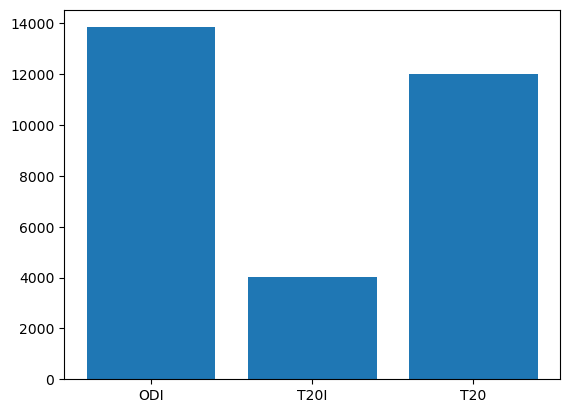

In [114]:
compare_runs('Virat Kohli')

In [115]:
def compare_wickets(name):
    odi_wicks = odi_df[odi_df['Full Name'] == 'Virat Kohli']['bow_Wkts'].values[0]
    t20i_wicks = t20i_df[t20i_df['Full Name'] == 'Virat Kohli']['bow_Wkts'].values[0]
    t20_wicks = t20s_df[t20s_df['Full Name'] == 'Virat Kohli']['bow_Wkts'].values[0]
    return plt.bar(['ODI','T20I','T20'],[odi_wicks,t20i_wicks,t20_wicks])

<BarContainer object of 3 artists>

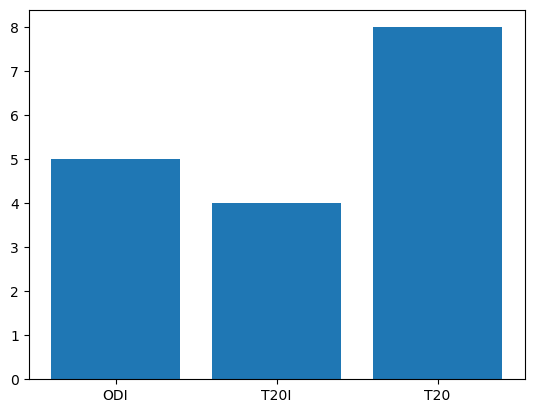

In [116]:
compare_wickets('Separamadu Lasith Malinga')

In [77]:
overall.duplicated().sum()

0

In [78]:
overall.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3740 entries, 0 to 3981
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Full Name          3740 non-null   object 
 1   Age                3740 non-null   int64  
 2   Batting Style      3715 non-null   object 
 3   Bowling Style      3147 non-null   object 
 4   Playing Role       2131 non-null   object 
 5   Fielding Position  413 non-null    object 
 6   matches            1439 non-null   float64
 7   runs               1288 non-null   float64
 8   High_score         763 non-null    float64
 9   Bat_Avg            1169 non-null   float64
 10  100s               1287 non-null   float64
 11  wickets            996 non-null    float64
 12  BBI                996 non-null    object 
 13  Bowl_Avg           848 non-null    float64
 14  5w                 996 non-null    float64
 15  Ct                 1430 non-null   float64
 16  St                 1430 

In [79]:
odi_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 715 entries, 0 to 772
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Full Name  715 non-null    object 
 1   matches    715 non-null    int64  
 2   Inns       684 non-null    float64
 3   bat_NO     684 non-null    float64
 4   bat_Runs   684 non-null    float64
 5   bat_HS     607 non-null    float64
 6   bat_Ave    650 non-null    float64
 7   bat_BF     684 non-null    float64
 8   bat_SR     681 non-null    float64
 9   bat_100s   684 non-null    float64
 10  bat_50s    684 non-null    float64
 11  bat_4s     684 non-null    float64
 12  bat_6s     684 non-null    float64
 13  bat_Ct     715 non-null    int64  
 14  bat_St     715 non-null    int64  
 15  bow_Balls  548 non-null    float64
 16  bow_Runs   548 non-null    float64
 17  bow_Wkts   548 non-null    float64
 18  bow_BBI    715 non-null    object 
 19  bow_BBM    715 non-null    object 
 20  bow_Ave   

In [80]:
odi_df.head()

,Full Name,matches,Inns,bat_NO,bat_Runs,bat_HS,bat_Ave,bat_BF,bat_SR,bat_100s,...,bow_Runs,bow_Wkts,bow_BBI,bow_BBM,bow_Ave,bow_Econ,bow_SR,bow_4w,bow_5w,bow_10w
0,Abu Hider Rony,2,1.0,0.0,1.0,1.0,1.00,11.0,9.09,0.0,...,89.0,3.0,2/50,2/50,29.66,4.94,36.0,0.0,0.0,0.0
1,Abu Jayed Chowdhury,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,114.0,5.0,5/58,5/58,22.80,6.33,21.6,0.0,1.0,0.0
2,Mohammed Abul Hasan,7,3.0,0.0,11.0,7.0,3.66,16.0,68.75,0.0,...,244.0,0.0,-,-,NaN,6.77,NaN,0.0,0.0,0.0
3,Afif Hossain Dhrubo,31,27.0,6.0,600.0,93.0,28.57,666.0,90.09,0.0,...,91.0,3.0,1/0,1/0,30.33,5.80,31.3,0.0,0.0,0.0
4,Aftab Ahmed Chowdhury,85,85.0,6.0,1954.0,92.0,24.73,2353.0,83.04,0.0,...,656.0,12.0,5/31,5/31,54.66,5.32,61.5,0.0,1.0,0.0
